## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">CAPSTONE PROJECT : NLP - CHATBOT INTERFACE

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain: Industrial safety. NLP based Chatbot

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Description:
<font color=yellow>
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Column Information:
<font color=yellow>
<b>Data :</b>timestamp or time/date information
<br><b>Countries :</b>which country the accident occurred (anonymised)
<br><b>Local :</b>the city where the manufacturing plant is located (anonymised)
<br><b>Industry sector :</b>which sector the plant belongs to
<br><b>Accident level :</b>from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
<br><b>Potential Accident Level :</b>Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
<br><b>Genre :</b>if the person is male of female
<br><b>Employee or Third Party :</b>if the injured person is an employee or a third party
<br><b>Critical Risk :</b>some description of the risk involved in the accident
<br><b>Description :</b>Detailed description of how the accident happened
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=yellow>
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description
</font>

- Import the necessary libraries:

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Load Dataset :

In [105]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/9Capstone/IHMStefanini_database.csv")
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [106]:
df.isna().values.any()

False

In [107]:
df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [108]:
df.nunique()

Unnamed: 0                  425
Data                        287
Countries                     3
Local                        12
Industry Sector               3
Accident Level                5
Potential Accident Level      6
Genre                         2
Employee or Third Party       3
Critical Risk                33
Description                 411
dtype: int64

In [109]:
for column in df.columns[2:10]:
    print(column)
    print(df[column].unique())
    print('-------------')

Countries
['Country_01' 'Country_02' 'Country_03']
-------------
Local
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-------------
Industry Sector
['Mining' 'Metals' 'Others']
-------------
Accident Level
['I' 'IV' 'III' 'II' 'V']
-------------
Potential Accident Level
['IV' 'III' 'I' 'II' 'V' 'VI']
-------------
Genre
['Male' 'Female']
-------------
Employee or Third Party
['Third Party' 'Employee' 'Third Party (Remote)']
-------------
Critical Risk
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipm

In [110]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


- Add Columns on Date attribute :

In [111]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['MonthName'] = df['Date'].apply(lambda x : x.month_name())
df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,WeekofYear,Weekday,MonthName
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,53,Friday,January
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,53,Saturday,January
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,1,Wednesday,January
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,1,Friday,January
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,1,Sunday,January


- In general the Season or Weather also a major contributor for any incidents, like Winter invite cold related issues, Summer invite hot stroke related health and safety concers, Monsoon invite slippery kind of safety issues, etc

- Let's develop the column that identify season when incident occured

- The data is collected from Brazil which is located in the Southern Hemisphere, its seasons are the exact opposite of what Northern Hemisphere residents.

  - Summer is December through Febraury

  - Autumn is March through May

  - Winter is June through August

  - Spring is Septemner through November

Within the country the climate varies considerably from region to region.

In [112]:
def seasonofyear(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

df['Season'] = df['Month'].apply(seasonofyear)

In [113]:
df.tail()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,WeekofYear,Weekday,MonthName,Season
420,2017-07-04,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,4,27,Tuesday,July,Winter
421,2017-07-04,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,4,27,Tuesday,July,Winter
422,2017-07-05,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,5,27,Wednesday,July,Winter
423,2017-07-06,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,6,27,Thursday,July,Winter
424,2017-07-09,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ...",2017,7,9,27,Sunday,July,Winter


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">EDA :
<font color=darkblue>
</font>

In [128]:
# function for distribution, frequency plot
def UnivariatePlot(aCol):
    aBar = df[aCol]
    aSeries = df.groupby(aCol)['Accident Level'].count()
    aLabel = aSeries.keys()  #df_accidents[aCol]
    aUnique = df[aCol].nunique()
    
    plt.figure(figsize= (14,7))
    
    # bar char showing count
    plt.subplot(1, 2, 1)
    plt.title(aCol + ' Count', fontsize=14)
    plt.xlabel(aCol, fontsize=13)
    plt.ylabel('Total number of Accidents', fontsize=13)
    ax = sns.countplot(aBar, data=df)    
    plt.tick_params(labelsize=13)
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    # pie chart showing percentage
    plt.subplot(1, 2, 2)
    plt.title(aCol + ' Percentage', fontsize=14)
    plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, startangle=90)
    # plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, rotatelabels =False, startangle=180, counterclock=True)
    plt.axis('equal')
    

    plt.show()

- Analysis of few key features :

ANALYSIS BY Country:


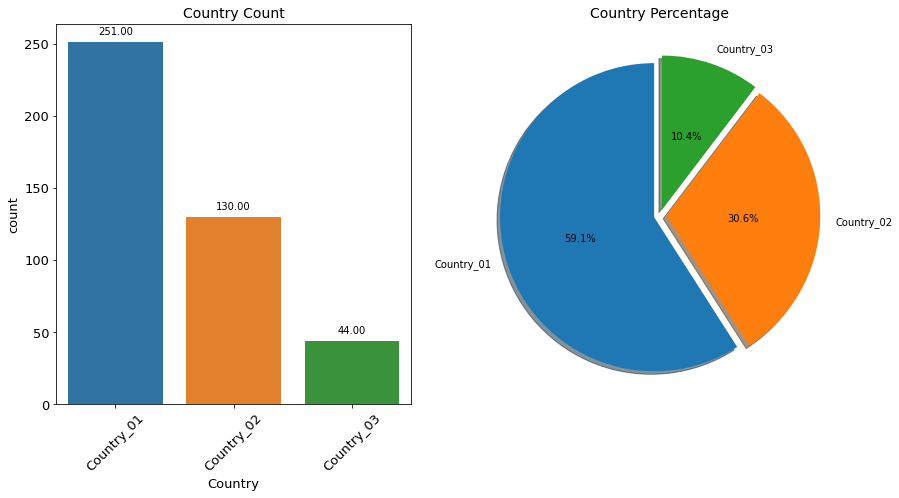

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Employee type:


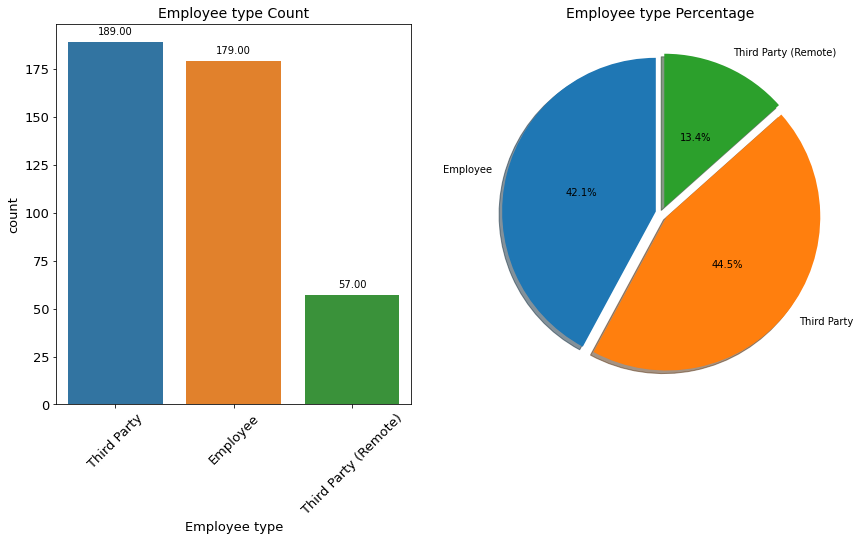

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Gender:


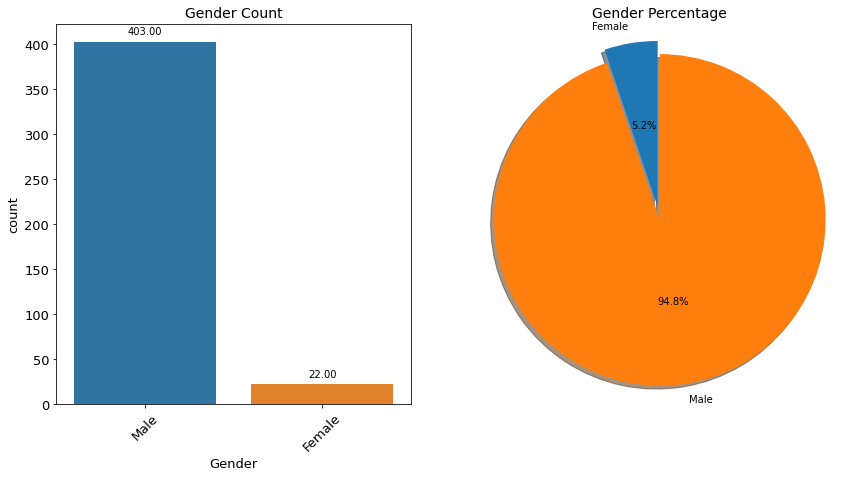

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Local:


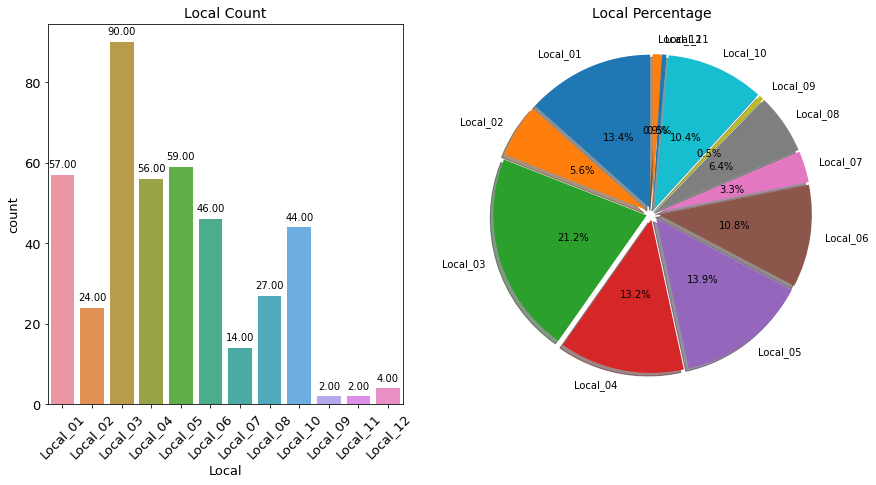

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Industry Sector:


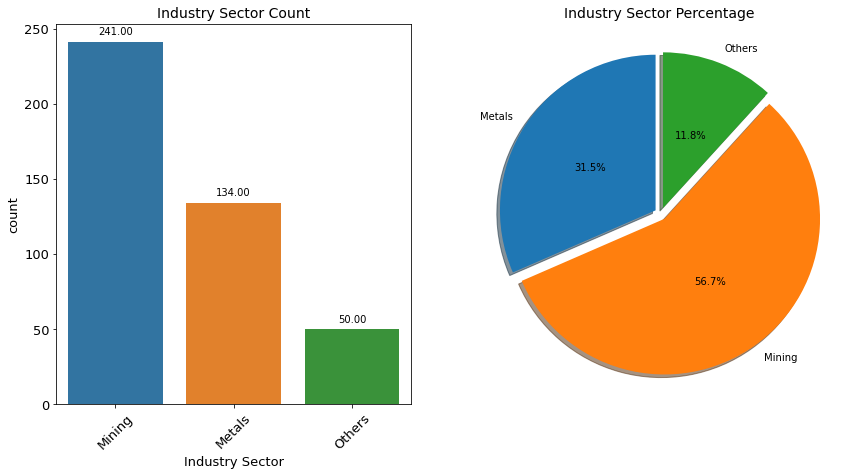

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Accident Level:


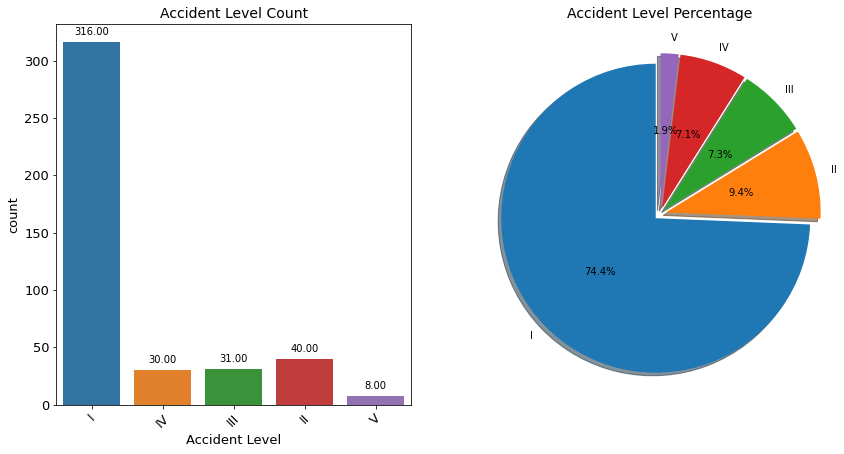

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Potential Accident Level:


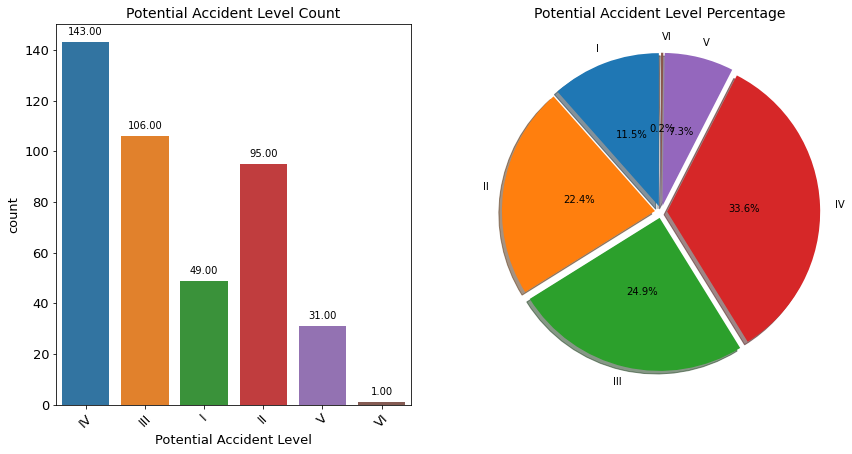

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Year:


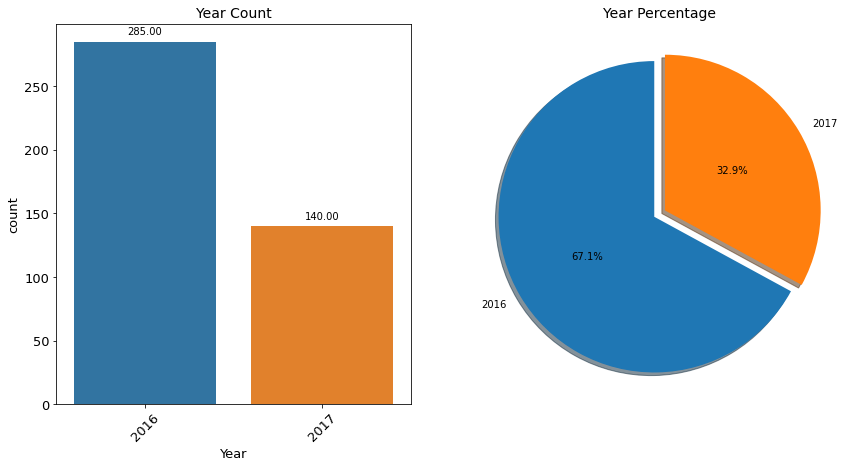

-----------------------------------------------------------------------------------------------------


In [162]:
for column in ['Country', 'Employee type','Gender','Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level','Risk Type']:
    print('ANALYSIS BY ' + column + ':')
    UnivariatePlot(column)
    print('-----------------------------------------------------------------------------------------------------')

- Observation :
    - Country_01 recorded with highest incident (59%) amongst all 3 countries

    - Country_03 recorded lowest (10.4%) amongst all 3 countires

    - Total 12 localities data from 3 countries captured**

    - Local_03 recorded with highest incident amongst all 12 countries**

    - 9 out of 12 localities have double digit incidents**

    - 3 localities have single digit low incidents**

    - Total 3 Industrial sectors covered

    - Mining recorded with highest incident - 56.7%

    - Metals stands high next to Mining Sector - 31.5%

    - Other sectors contribute lowest incidents - 11.8%

    - Accident Level - I occured at high frequency 74.4%

    - Accident Level - V occured at low frequency 1.9%

    - High Level accidents are lower and Low Level accidents are higher

    - Predicted Potential Accident Level - IV is at high frequency 33.6%

    - Predicted Potential Accident Level - VI is just 1 occasio - 0.2%

    - Actual Accident levels are different than Predicted Potential Accident Level

    - Males are high prone to exposed to Accident (94.8% compare to Females (5.2%)

    - Third Party Employees and Direct Employees are more prone to Accident than Remote working third party

    - Accidents are categories into 33 types of Risk Types

    - Undefined other type of Risks contribute to 54.6% accident

    - It indicates deep investigation and proactive approaches - FMEA/RCA are needed to identify the type of risks



- Analysis by time of the year that is Weekday, Month  and Season:

ANALYSIS BY Year:


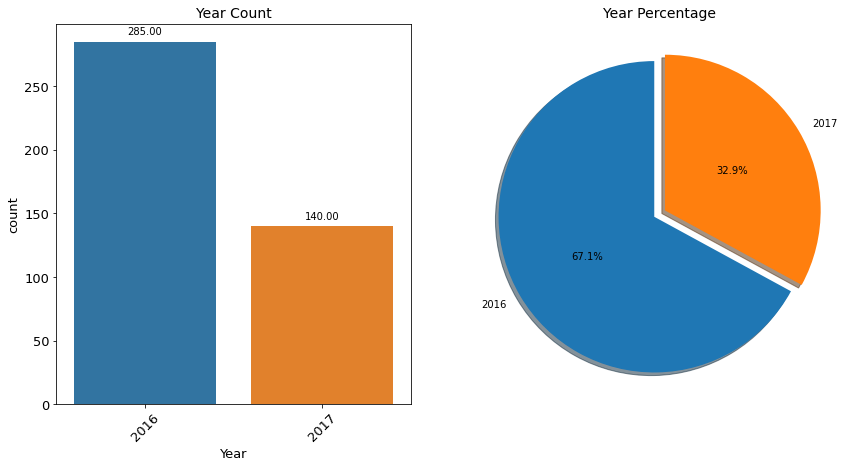

------------------------------------
ANALYSIS BY Month:


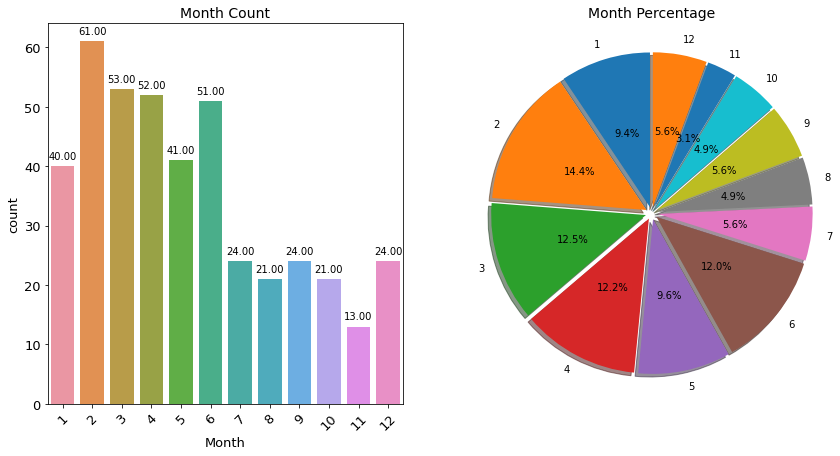

------------------------------------
ANALYSIS BY Day:


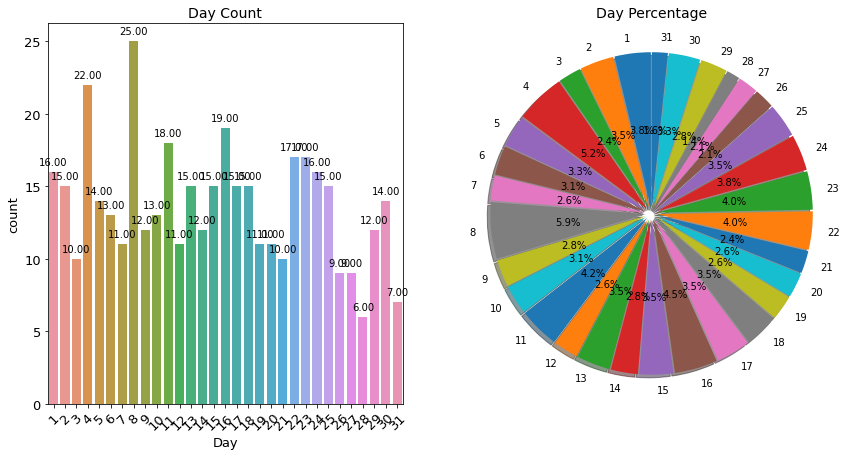

------------------------------------
ANALYSIS BY WeekofYear:


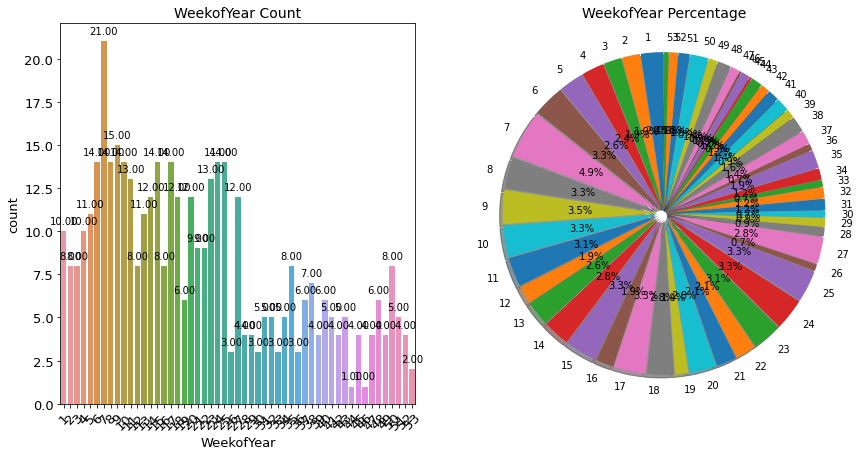

------------------------------------
ANALYSIS BY Weekday:


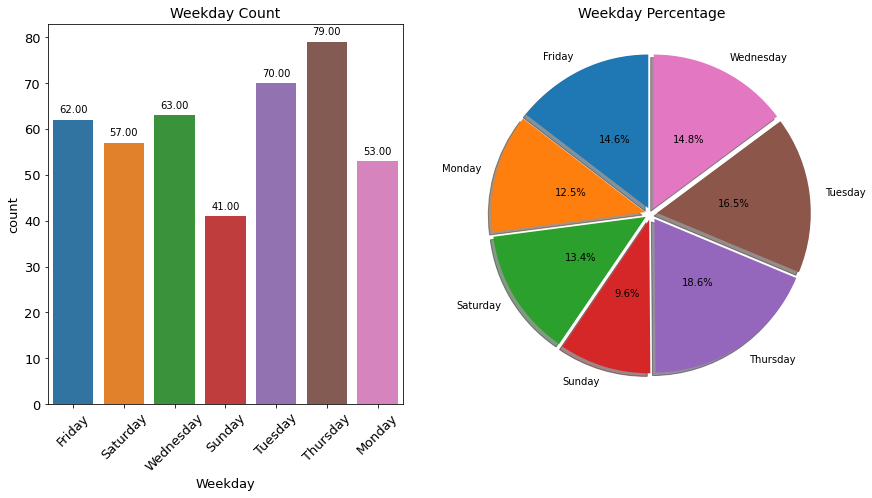

------------------------------------
ANALYSIS BY MonthName:


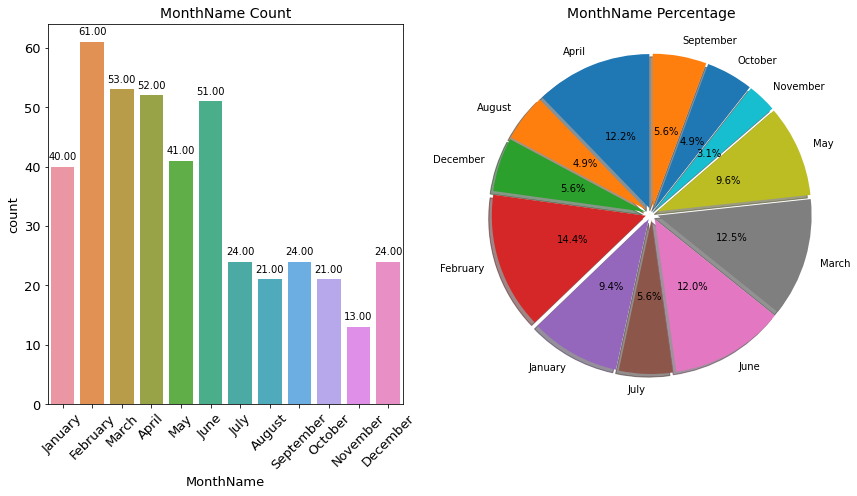

------------------------------------
ANALYSIS BY Season:


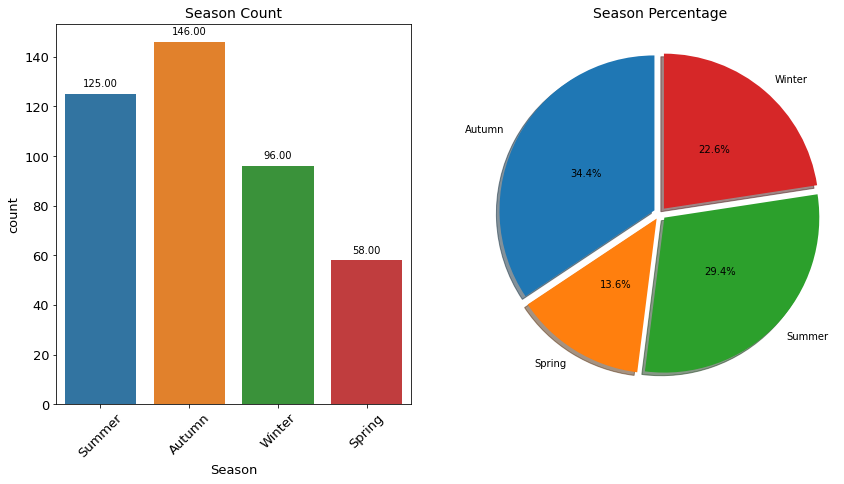

------------------------------------


In [163]:
for column in df.columns[10:18]:
    print('ANALYSIS BY ' + column + ':')
    UnivariatePlot(column)
    print('------------------------------------')

- Observations: 
  - Y-2017 Accident is halved Y-2016 - Good controls in Accidents and safety performance

  - In general Accident occurs through the year irrespective of months

  - However in the month of Feb and Apr accident level is high

  - July, Oct & Dec have 50% of reduced accident level than Feb & Apr

  - Beginning of every month have more accidents.

  - End of the the month relatively accidents are at lower side

  - Except Sunday all other days there is a accident

  - However Sunday also Accident occurs

  - Almost equal amount of accident occurs across all seasons except Spring


- Bivariate Analysis: 

In [125]:
# Multivariate analysis on Accident Level/Potential Accident levels
def MultivariatePlot(aCol):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(aCol.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 45)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(aCol.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 45)
    return plt.show()

ANALYSIS BY Country on Accident Level / Potential Accident Level:


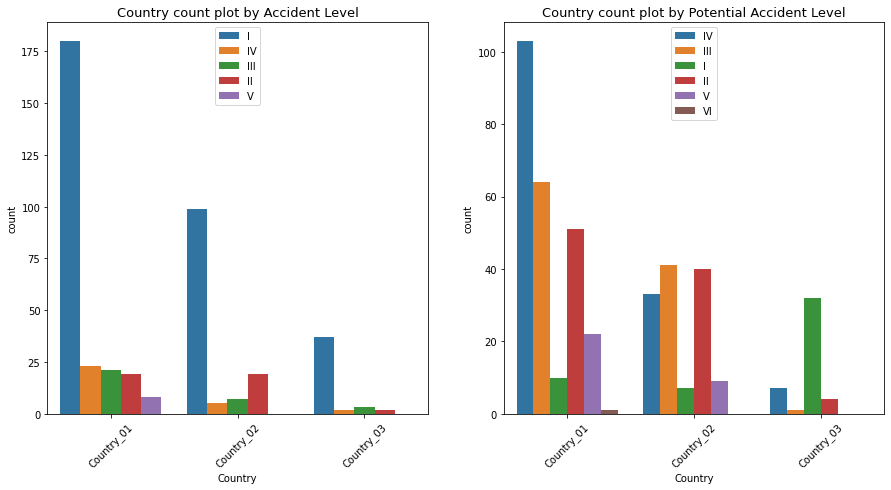

------------------------------------
ANALYSIS BY Gender on Accident Level / Potential Accident Level:


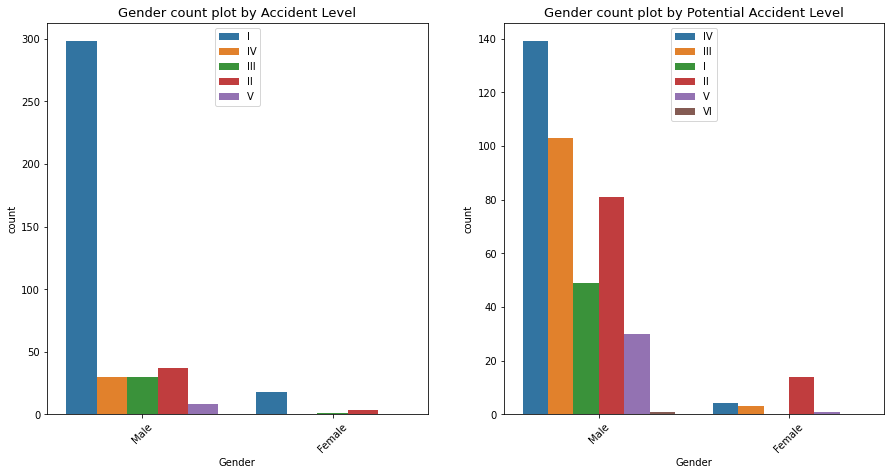

------------------------------------
ANALYSIS BY Industry Sector on Accident Level / Potential Accident Level:


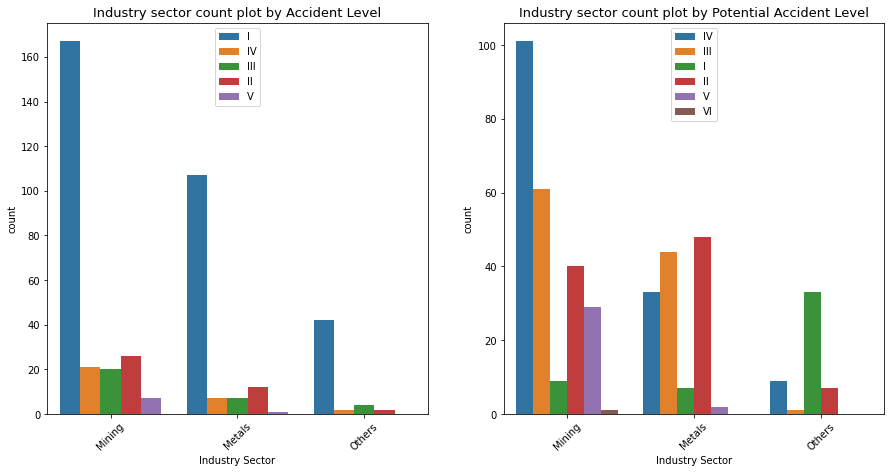

------------------------------------
ANALYSIS BY Employee type on Accident Level / Potential Accident Level:


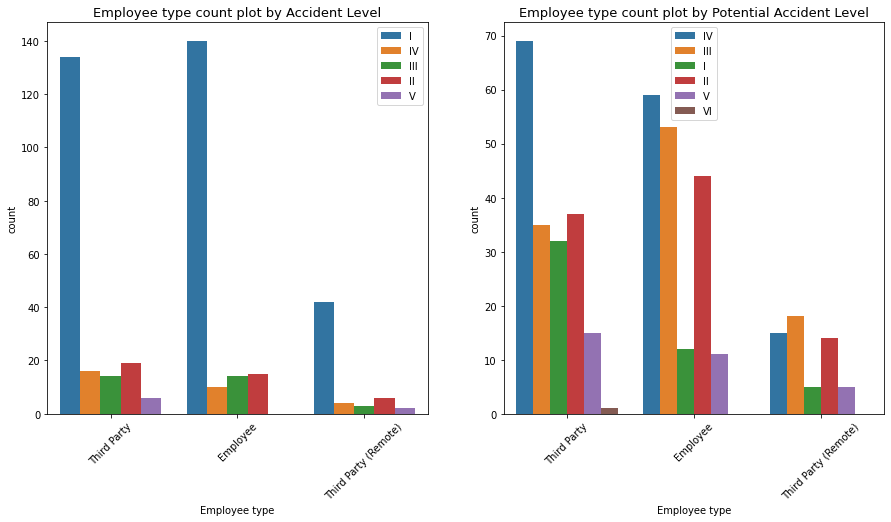

------------------------------------
ANALYSIS BY Month on Accident Level / Potential Accident Level:


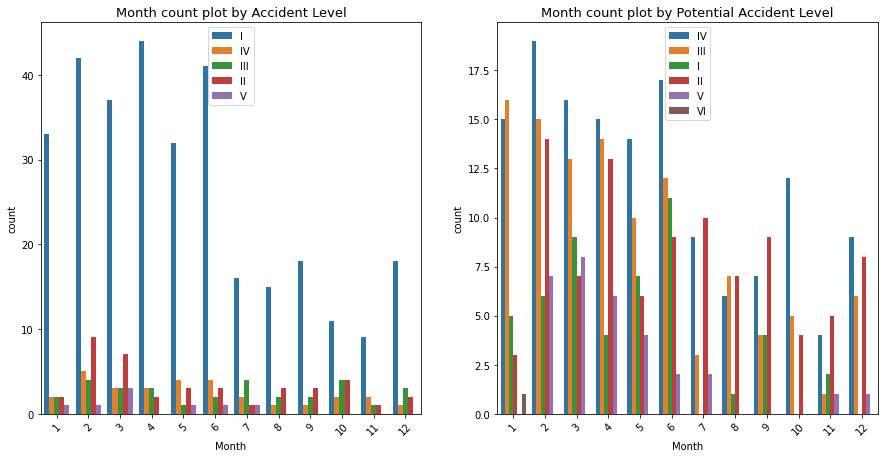

------------------------------------
ANALYSIS BY Season on Accident Level / Potential Accident Level:


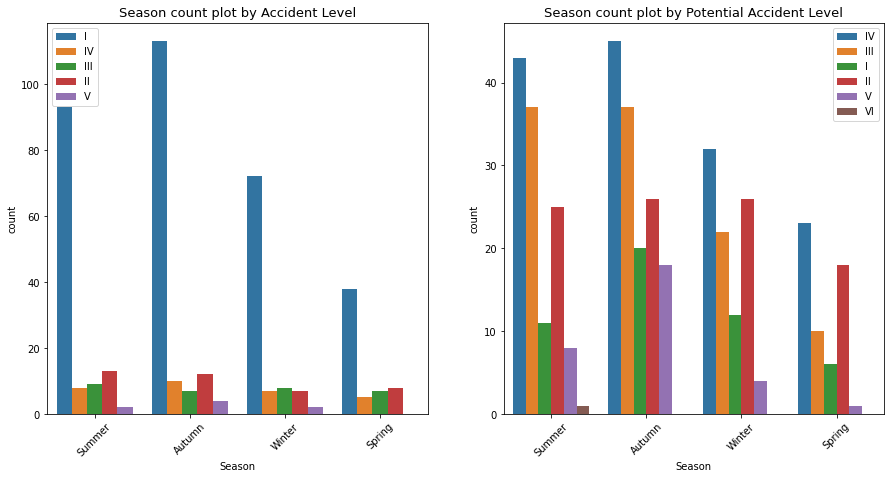

------------------------------------
ANALYSIS BY Weekday on Accident Level / Potential Accident Level:


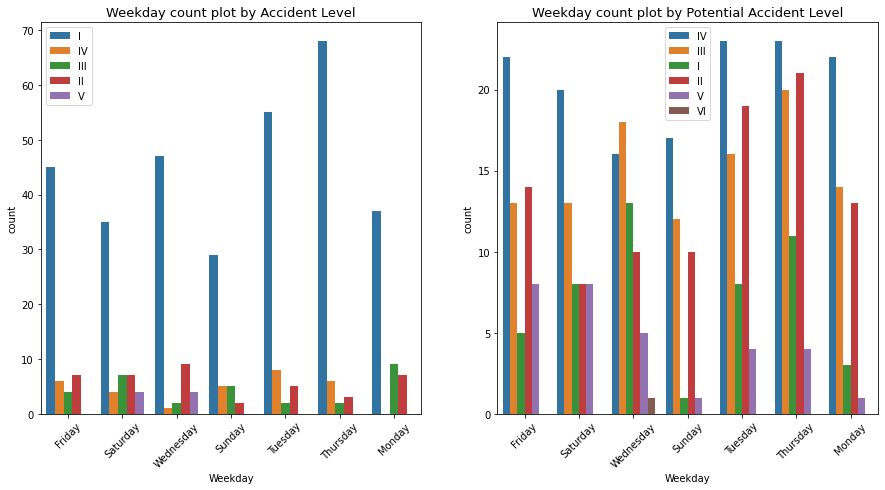

------------------------------------


In [133]:
for column in ['Country', 'Gender', 'Industry Sector', 'Employee type', 'Month', 'Season', 'Weekday']:
    print('ANALYSIS BY ' + column + ' on Accident Level / Potential Accident Level:')
    MultivariatePlot(column)
    print('----------------------------------------------------------------------------')

Text(0.5, 1.0, 'By Empl type')

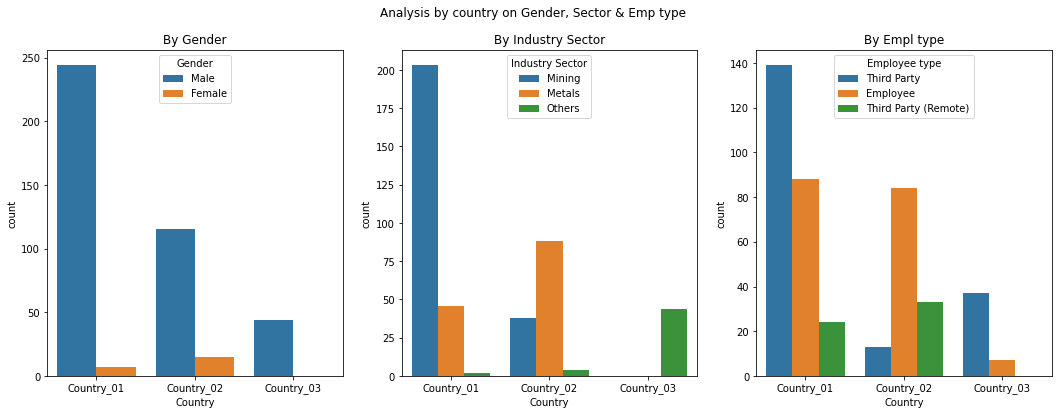

In [152]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('Analysis by country on Gender, Sector & Emp type')

# column ='Gender'
sns.countplot(x="Country", data=df , hue= 'Gender', ax=axes[0])
axes[0].set_title('By Gender')

# column ='Industry Sector'
sns.countplot(x="Country", data=df , hue= 'Industry Sector', ax=axes[1])
axes[1].set_title('By Industry Sector')

# column ='Employee type'
sns.countplot(x="Country", data=df , hue= 'Employee type', ax=axes[2])
axes[2].set_title('By Empl type')

Text(0.5, 1.0, 'Analysis by Employee Type on Gender:')

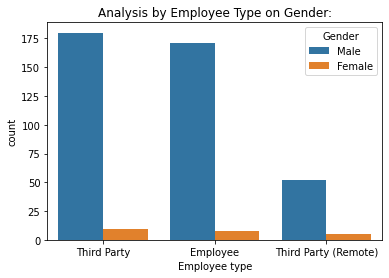

In [160]:
ax = sns.countplot(x="Employee type", data=df, hue="Gender")
ax.set_title("Analysis by Employee Type on Gender:")

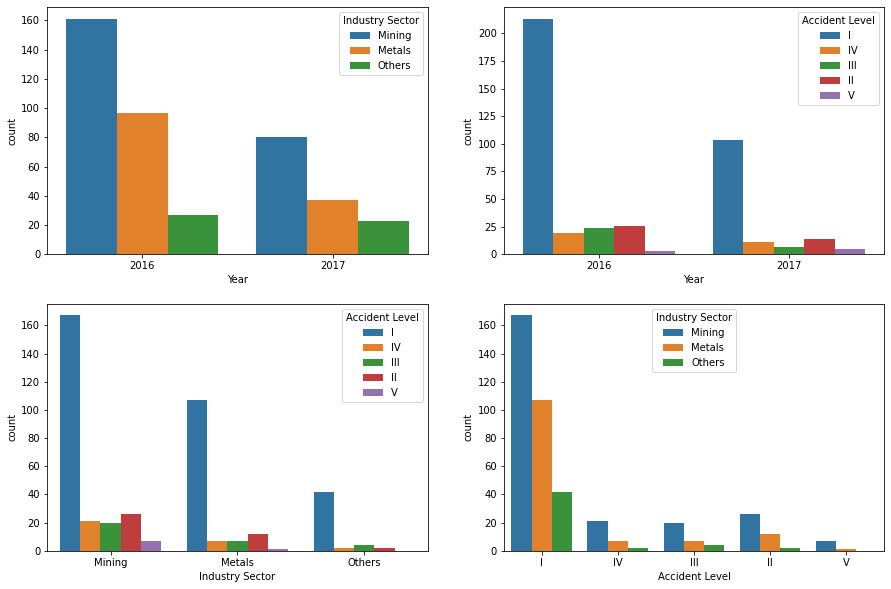

In [161]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df['Year'], hue='Industry Sector', data=df,ax=axs[0][0])
sns.countplot(x=df['Year'], hue='Accident Level', data=df,ax=axs[0][1])
sns.countplot(x=df['Industry Sector'], hue='Accident Level', data=df,ax=axs[1][0])
sns.countplot(x=df['Accident Level'], hue='Industry Sector', data=df,ax=axs[1][1])

- Analysis on Description:

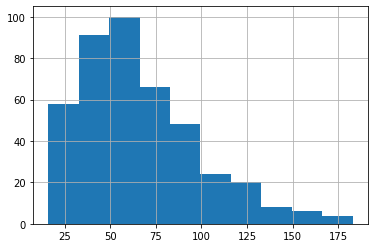

In [164]:
#Number of Words in each Description (row):
df['Description'].str.split().map(lambda x: len(x)).hist()

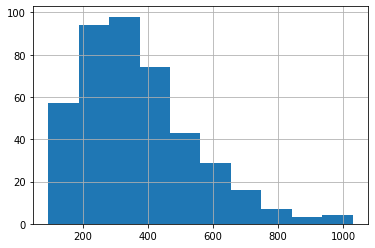

In [166]:
#Number of Characters in each Description (row):

df['Description'].str.len().hist()

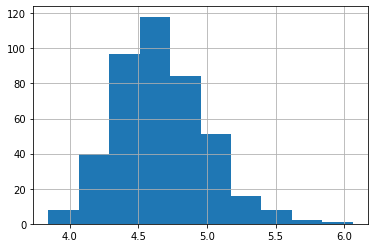

In [168]:
#Average Word length:
df['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

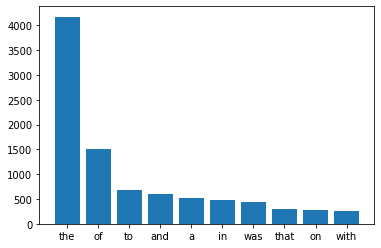

In [171]:
# Stopword Average:

from nltk.corpus import stopwords

def plot_top_stopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords(df['Description'])

In [ ]:
#----------------------- DO not look below ############################################